# Tarefa 1

A proposta é implementar a solução aproximada para a a função de probabilidade acumulada normal padrão $\Phi(y)$, de acordo com o apresentado no Anexo F do livro de referência. <br>
O código abaixo apresenta a construção das aproximações de $\Phi(y)$ para os intervalos $0 \leq y \leq \infty$ e $-\infty \leq y \leq 0$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores do parâmetro p_i
p_i = [0.231641900, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429]

# Função w 
def w (y):
    return 1 / (1 + (p_i[0] * abs(y)))

# Função z
def z (w):
    return (w * (p_i[1] + w * (p_i[2] + w * (p_i[3] + w * (p_i[4] + w * p_i[5])))))

# Aproximação analítica para a função de probabilidade acumulada
# Para y negativo
def phi_neg (z , y):
    return (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))

# Para y positivo
def phi_pos (z , y):
    return 1 - (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))



O código abaixo apresenta a verificação e plotagem da função $\Phi(y)$ para o intervalo $-10 \leq y \leq 10$

In [ ]:
# Verificação das funções
# Vetores para guardar os resultados 
phi_neg_results = []
phi_pos_results = []
y_neg = []
y_pos = []
for y in range(-10 , 11, 1):
    if y < 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
    elif y == 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)
    else:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)

# Plotagem dos resultados
fig, ax = plt.subplots()
ax.plot(y_neg, phi_neg_results, color='black')
ax.plot(y_pos, phi_pos_results, color='black')
plt.xlabel('y')
plt.ylabel('$\\Phi(y)$')
plt.show()

Agora temos que o código abaixo apresenta a implementação da função CDF inversa $y=\Phi^{-1}(u)$

In [ ]:
# Formulação da função inversa

# Valores do parâmetro p_i
p = [-0.3222324310880, -1.0000000000000, -0.3422422088547, -0.2042312102450e-1, -0.4536422101480e-4]

# Valores do parâmetro q_i
q = [0.9934846260600e-1, 0.5885815704950, 0.5311034623660, 0.10353775285000, 0.3856070063400e-2]

# Função inversa
# Para 0 < u <= 0.5
def y_1 (u):
    z = np.sqrt(np.log(1 / (u ** 2)))
    return -z - ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

# Para 0.5 <= u < 1
def y_2 (u):
    z = np.sqrt(np.log (1 / ((1 - u) ** 2)))
    return z + ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

Como verificação da implementação, calcula-se $\Beta_{num}=\Phi^{-1}(\Phi(-\Beta))$. O código abaixo apresenta o cálculo de $\Beta_{num}$ e plota o resultado para um intervalo $-8 \leq \Beta \leq 0$

In [1]:
# Verificação da implementação

vetor_beta = [] 
vetor_beta_aprox = []

for i in np.arange (0, 9, 1):
    w_calc = w(i)
    z_calc = z(w_calc)
    vetor_beta.append(-1 * i)
    result = 1- phi_pos(z_calc, i)
    if result > 0:
        if result <= 0.5:
            inverse_result = y_1(result)
        else:
            inverse_result = y_2(result)
        vetor_beta_aprox.append(inverse_result)
   
plt.plot(vetor_beta, vetor_beta_aprox)
plt.xlabel('$-\\beta$')
plt.ylabel('$-\\beta_{num}$')
plt.show()



NameError: name 'np' is not defined

# Tarefa 2
Temos que no código abaixo possui a implementação das seguintes distribuições: <br>
- Distribuição normal;
- Distribuição log-normal;
- Gumbel para máximos e Gumbel para mínimos <br>

No código abaixo, temos uma estrutura de _data members_, na qual é possível calcular os momentos da distribuição (média, variância, desvio-padrão, coeficiente de variação, skewness e kurtosis) dado os parâmetros. <br>
Além disso, há uma estrutura de _member functions_ que calcula as funções $PDF$, $CDF$ e $CDF^{-1}$ e também calcula os parâmetros dados os momentos.


In [1]:
from scipy import stats as st 
import numpy as np
import matplotlib.pyplot as plt

# Data members
class variavel_aleatoria:
    # Função para identificar qual é a distribuição, o nome da variável e o simbolo da distribuição
    def __init__(self, distribuicao: str, nome: str = "", simbolo: str =""):
        # Identificação
        self.nome = nome
        self.simbolo = simbolo
        self.distribuicao = distribuicao  

        # Lista de argumentos
        self.parametros = []
        self.objeto = None

        # Momentos da variável
        self.media = np.nan 
        self.variancia = np.nan
        self.desvio = np.nan
        self.cv = np.nan # Coeficiente de variação
        self.skewness = np.nan
        self.kurtosis = np.nan

        # Distribuições implementadas
        self.distribuicoes = {
            'normal' : st.norm,
            'lognormal' : st.lognorm,
            'gumbel_max': st.gumbel_r,
            'gumbel_min': st.gumbel_l,
            'uniforme': st.uniform
        }

        # Aqui as distribuições contempladas são atribuidas ao componente objeto
        self.objeto = self.distribuicoes[self.distribuicao]

        # Aqui os parâmetros de cada distribuição são definidos e os momentos calculados a partir dos parâmetros
    def conjunto_parametros (self, *params):
        self.parametros = list(params)
        self.calculo_momentos()
    
        # Aqui os momentos são calculados a partir dos parametros
    def calculo_momentos(self):
        m, v, sk, k = self.objeto.stats(*self.parametros, moments = 'mvsk')

        # Armazenamento dos momentos nas variáveis
        self.media = float(m)
        self.variancia = float(v)
        self.desvio = np.sqrt(self.variancia)
        self.skewness = float(sk)
        self.kurtosis = float(k)

        if self.distribuicao == 'uniforme':
            loc = self.parametros[0]
            scale = self.parametros[1]

            a = loc
            b = loc + scale

            self.media = (a + b) / 2.0
            self.variancia = (scale ** 2) / 12
            self.desvio = np.sqrt(self.variancia) 
            self.skewness = 0.0
            self.kurtosis = 1.8

        if self.media != 0:
            self.cv = self.desvio / self.media
        else:
            self.cv = np.nan

    # Aqui calcula-se os parametros de cada distribuição dado os momentos (média e desvio padrão)
    def calculo_parametros (self, media_dada: float, desvio_dado: float):
        mu = media_dada
        sigma = desvio_dado

        if self.distribuicao =='normal':
            self.conjunto_parametros(mu, sigma)
        
        elif self.distribuicao == 'lognormal':
            zeta = np.sqrt(np.log(1.0 + (sigma / mu) ** 2))
            lam = np.log(mu) - (0.5 * (zeta ** 2))
            scale = np.exp(lam)
            self.conjunto_parametros(zeta, 0.0, scale)
        
        elif self.distribuicao == 'uniforme':
            scale = desvio_dado * np.sqrt(12)
            loc = media_dada - (scale / 2.0)
            self.calculo_parametros(loc, scale)

        elif self.distribuicao in ['gumbel_max', 'gumbel_min']:
            mu = media_dada
            sigma = desvio_dado
            gamma = 0.5772156649 #Constante de Euler
            beta = (sigma * np.sqrt(6)) / np.pi 

            if self.distribuicao == 'gumbel_max':
                mu_calc = mu - (gamma * beta)
            else:
                mu_calc = mu + (gamma * beta)
            self.conjunto_parametros(mu_calc, beta)
    
    # Agora vamos construir as funções fundamentais (PDF, CDF, Inversa)
    def PDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.pdf(x, *self.parametros)
        return np.nan
    
    def CDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.cdf(x, *self.parametros)
        return np.nan
    
    def InversaCDF (self, p: float) -> float:
        if self.objeto:
            return self.objeto.ppf(p, *self.parametros)
        return np.nan

/home/gabrielsilverio/anaconda3/envs/confiabilidade_env/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


Agora, para cada distribuição implementada, vamos testar a estrutura anterior calculando os momentos das variáveis dado os parâmetros e plotando as funções $PDF$ e $x_{aprox} = CDF^{-1}(x,CDF(X,x))$. <br>

# Teste da estrutura para a distribuição normal
Neste teste vamos supor uma variável X ~ N(50,200) e apresentar o cálculo dos momentos à partir dos parâmetros.


In [ ]:
#Teste da estrutura
X_normal = variavel_aleatoria(distribuicao = 'normal', nome='VA normal', simbolo='X_N')
media_dada = 200
sigma_dado = 50
X_normal.conjunto_parametros(media_dada, sigma_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição normal: Calculo dos momentos dados os parâmetros')
print(f"X: {X_normal.nome}")
print(f"Parâmetros: {X_normal.parametros}")
print(f"Média calculada: {X_normal.media}")
print(f"Desvio padrão: {X_normal.desvio}")
print(f"Coeficiente de variação: {X_normal.cv}")
print(f"Skewness: {X_normal.skewness}")
print(f"Kurtosis: {X_normal.kurtosis}")

Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ para um intervalo $\mu - 3\sigma \leq x \leq \mu + 3\sigma$ e também vamos plotar a função $PDF$.

In [ ]:
import matplotlib.pyplot as plt

x_min = media_dada - (6 * sigma_dado)
x_max = media_dada + (6 * sigma_dado)
x_real = np.linspace(x_min, x_max, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_normal.CDF(x)
    pdf_calc = X_normal.PDF(x)
    x_calc = X_normal.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição lognormal
Neste teste vamos supor uma variável X ~ LN(5, 0.2) e apresentar o cálculo dos momentos à partir dos parâmetros.


In [ ]:
#Teste da estrutura
X_lognormal = variavel_aleatoria(distribuicao = 'lognormal', nome='VA lognormal', simbolo='X_LN')
zeta_dado = 0.2
lamb_dado = 5
X_lognormal.conjunto_parametros(zeta_dado, 0, float(np.exp(lamb_dado)))

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição lognormal: Calculo dos momentos dados os parâmetros')
print(f"X: {X_lognormal.nome}")
print(f"Parâmetros: {lamb_dado, zeta_dado}")
print(f"Média calculada: {X_lognormal.media}")
print(f"Desvio padrão: {X_lognormal.desvio}")
print(f"Coeficiente de variação: {X_lognormal.cv}")
print(f"Skewness: {X_lognormal.skewness}")
print(f"Kurtosis: {X_lognormal.kurtosis}")

Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

In [ ]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_lognormal.InversaCDF(x_min)
x_max_plot = X_lognormal.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_lognormal.CDF(x)
    pdf_calc = X_lognormal.PDF(x)
    x_calc = X_lognormal.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição Gumbel para máximos
Neste teste vamos supor uma variável EVI ~ LN(5, 0.1) e apresentar o cálculo dos momentos à partir dos parâmetros.

In [ ]:
#Teste da estrutura
X_gumbel_max = variavel_aleatoria(distribuicao = 'gumbel_max', nome='VA Gumbel para máximos', simbolo='X_EVI')
mi_dado = 5
beta_dado = 0.1
X_gumbel_max.conjunto_parametros(mi_dado, beta_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição Gumbel para máximos: Calculo dos momentos dados os parâmetros')
print(f"X: {X_gumbel_max.nome}")
print(f"Parâmetros: {mi_dado, beta_dado}")
print(f"Média calculada: {X_gumbel_max.media}")
print(f"Desvio padrão: {X_gumbel_max.desvio}")
print(f"Coeficiente de variação: {X_gumbel_max.cv}")
print(f"Skewness: {X_gumbel_max.skewness}")
print(f"Kurtosis: {X_gumbel_max.kurtosis}")

Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

In [ ]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_gumbel_max.InversaCDF(x_min)
x_max_plot = X_gumbel_max.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_gumbel_max.CDF(x)
    pdf_calc = X_gumbel_max.PDF(x)
    x_calc = X_gumbel_max.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# Teste da estrutura para a distribuição Gumbel para mínimo
Neste teste vamos supor uma variável EVI ~ LN(5, 0.1) e apresentar o cálculo dos momentos à partir dos parâmetros.

In [ ]:
#Teste da estrutura
X_gumbel_min = variavel_aleatoria(distribuicao = 'gumbel_min', nome='VA Gumbel para mínimos', simbolo='X_EVI')
mi_dado = 5
beta_dado = 0.1
X_gumbel_min.conjunto_parametros(mi_dado, beta_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição Gumbel para mínimos: Calculo dos momentos dados os parâmetros')
print(f"X: {X_gumbel_min.nome}")
print(f"Parâmetros: {mi_dado, beta_dado}")
print(f"Média calculada: {X_gumbel_min.media}")
print(f"Desvio padrão: {X_gumbel_min.desvio}")
print(f"Coeficiente de variação: {X_gumbel_min.cv}")
print(f"Skewness: {X_gumbel_min.skewness}")
print(f"Kurtosis: {X_gumbel_min.kurtosis}")

Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ e também vamos plotar a função $PDF$.

In [ ]:
import matplotlib.pyplot as plt

x_min = 0.001
x_max = 0.999
x_min_plot = X_gumbel_min.InversaCDF(x_min)
x_max_plot = X_gumbel_min.InversaCDF(x_max)
x_real = np.linspace(x_min_plot, x_max_plot, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_gumbel_min.CDF(x)
    pdf_calc = X_gumbel_min.PDF(x)
    x_calc = X_gumbel_min.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'r')
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()

# Plotar função PDF
plt.plot(x_real, pdf)
plt.xlabel('$x$')
plt.ylabel('$\\phi(x)$')
plt.show()

# TAREFA 3
Temos que o código abaixo faz o caclulo da matriz de correlação $R_z$ utilizando a distribuição de Nataf e calcula os Jacobianos $J_{yz}$ e $J_{zy}$ da tranformação $(Z -> Y)$ tanto utilizando a decomposição de Cholesky quanto a decomposição ortogonal.

In [2]:
import numpy as np
from UQpy.transformations import Nataf
from UQpy.distributions import Normal as uqpynormal
from UQpy.distributions import Lognormal as uqpylognormal
from UQpy.distributions import Uniform as uqpyuniform
from UQpy.distributions.collection import GeneralizedExtreme as uqpygev  

# Função de mapeamento para o uso do UQpy que retorna os parametros de cada distribuição
def mapeamento_uqpy(va_cust):
    tipo = va_cust.distribuicao.lower()
    parametros = va_cust.parametros

    if tipo == 'normal':
        return uqpynormal(loc=parametros[0], scale=parametros[1])

    elif tipo == 'lognormal':
        return uqpylognormal(s=parametros[0], loc=parametros[1], scale=parametros[2])
    
    elif tipo in ['gumbel_max', 'gumbel_min']:
        shape_c = 0.0
        loc = parametros[0]   
        scale = parametros[1] 
        return uqpygev(c=shape_c, loc=loc, scale=scale)
    
    elif tipo == 'uniforme':
        loc = parametros[0]
        scale = parametros[1]
        return uqpyuniform(loc=loc, scale=scale)
    
    else:
        raise ValueError(f"Distribuição '{tipo}' não mapeada")
        
# Data members
class vetores_variavel_aleatoria:
    matriz_observações: np.ndarray # Cada linha é uma variável aleatória X_i e cada coluna uma observação
    vetor_va_cust: list
    matriz_correlacao_x: np.ndarray # Matriz de correlação
    matriz_correlacao_z: np.ndarray = None

    # Função de recebimento do vetor
    def __init__(self, matriz_observacoes: np.ndarray, vetor_va_cust: list):
        
        self.matriz_observações = matriz_observacoes
        self.vetor_va_cust = vetor_va_cust
        self.calc_matriz_correlacao()

    # Determinação da dimensão do vetor de variáveis aleatórias
    def dimensao (self) -> tuple:
        return np.shape(self.vetor_va_cust)
    
    # Calculo da matriz de correlação Rx
    def calc_matriz_correlacao(self):
        self.matriz_correlacao_x = np.corrcoef(self.matriz_observações)
        return self.matriz_correlacao_x

    # Calculo da matriz de correlação no espaço normal padrão (Rz) 
    def matriz_correlacao_nataf(self) -> np.ndarray:
        distribuicoes_uqpy = [mapeamento_uqpy(va) for va in self.vetor_va_cust]
        
        nataf_obj = Nataf(distributions=distribuicoes_uqpy, corr_x=self.matriz_correlacao_x)
        
        Rz = nataf_obj.corr_z # Matriz de corelação zij
        self.matriz_correlacao_z = Rz
        
        return Rz
    
    # Matriz de eliminação da correlação via decomposição de Cholesky e calculo dos Jacobianos Z -> Y
    def decomposicao_cholesky(self) -> np.ndarray:
        B = np.linalg.cholesky(self.matriz_correlacao_z)
        
        L = np.linalg.inv(B.T)
        Jyz = np.linalg.inv(L) # Jacobiano Jyz
        Jzy = L # Jacobiano Jzy

        return Jyz, Jzy
    
    # Matriz de eliminação da correlação via decomposição de decomposição ortogonal e calculo dos Jacobianos Z -> Y
    def descorrelacao_autovetores(self) -> np.ndarray:
        Rz = self.matriz_correlacao_z

        # W é o vetor de autovalores
        # A_barra é a matriz onde cada coluna é um autovetor de Rz 
        W, A_barra = np.linalg.eigh(Rz) 

        # Construção da diagonal da matriz inversa dos auto-valores
        Lambda_inv_sqrt = np.diag(1.0 / np.sqrt(W))

        # Matriz de descorrelação A
        A = A_barra @ Lambda_inv_sqrt

        # Jacobiano Jyz
        Jyz = A.T

        # Jacobiano Jzy
        Jzy = np.linalg.inv(A.T)

        return Jyz, Jzy

Para verificação do código implementado, considera-se um exemplo composto por 4 variáveis aleatórias com com diferentes distribuições, das quais é conhecido a média $(\mu)$ e o desvio padrão $(\sigma)$: <br>

$$
X_1 - N(10, 2) \\
X_2 - LN(12, 3) \\
X_3 - EVI_{máx}(8, 1.5) \\
X_4 - EVI_{min}(5, 1) \\
$$
A matriz de correlação entre as variáveis é: <br>

$$
R_x = 
\begin{pmatrix}
1 & 0.4 & 0 & 0 \\
0.4 & 1 & 0 & 0.5 \\
0 & 0 & 1 & 0.5 \\
0 & 0.5 & 0.5 & 1
\end{pmatrix}
$$


In [ ]:
import numpy as np

# Para cada variável é concido os momentos (média e desvio padrão) e a matriz de correlação Rx

X1 = variavel_aleatoria(distribuicao='normal', nome='X1_Normal', simbolo='X1-N')
X1.conjunto_parametros(10.0, 2.0)

X2 = variavel_aleatoria(distribuicao='lognormal', nome='X2_LogNormal', simbolo='X2-LN')
X2.calculo_parametros(12.0, 3.0) 

X3 = variavel_aleatoria(distribuicao='gumbel_max', nome='X3_GumbelMax', simbolo='X3-EV1')
X3.calculo_parametros(8.0, 1.5)

X4 = variavel_aleatoria(distribuicao='gumbel_min', nome='X4_GumbelMin', simbolo='X4-EV1')
X4.calculo_parametros(5.0, 1.0)

vetor_va = [X1, X2, X3, X4]

# Matriz de correlação suposta
Rx_entrada = np.array([
    [1.0, 0.4, 0.0, 0.0],
    [0.4, 1.0, 0.0, 0.5],
    [0.0, 0.0, 1.0, 0.5],
    [0.0, 0.5, 0.5, 1.0]
])

# Matriz de observações, neste caso é necessária apenas para inicial o algoritmo
# uma vez que Rx foi dado, porém deve conter as mesmas dimensões de Rx
matriz_dummy_obs = np.zeros((4, 4)) 

# Aqui chamamos a classe criada para calcular a tranformação Z -> Y
objeto = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)

# Calculo da dimensão do vetor de variáveis aleatórias 

dimensão_vetor = objeto.dimensao()

# Forçamos Rx para a matriz de entrada, eliminando a necessidade de da matriz de observações
objeto.matriz_correlacao_x = Rx_entrada

# Cálculo da matriz de correlação equivalente
Rz = objeto.matriz_correlacao_nataf()

# Calculo dos Jacobianos Jyz e Jzy via decomposição de Cholesky
J_yz_cho, J_zy_cho = objeto.decomposicao_cholesky()

# Calculo dos Jacobianos Jyz e Jzy via decomposição ortogonal
J_yz_ort, J_zy_ort = objeto.decomposicao_cholesky()

teste = J_zy_ort @ J_yz_ort


# Impressão dos resultados

print(f"Dimensão do vetor de variáveis aleatórias: {dimensão_vetor}") # Dimensão do vetor de variáveis aleatrorias
print(f"Vetor de variáveis aleatórias: {[va.simbolo for va in vetor_va]}") # Vetor de variáveis aleatórias
print(f"Matriz de correlação Rx: \n{Rx_entrada}") # Matriz de correlação Rx
print(f"Matriz de correlação equivalente Rz (Modelo de Nataf): \n{Rz}") # Matriz de correlação equivalente Rz
print(f"Jacobianos de eliminação de correlação segundo deocmposição de Cholesky")
print(f"Jyz = \n{J_yz_cho}")
print(f"Jyz = \n{J_zy_cho}")
print(f"Jacobianos de eliminação de correlação segundo deocmposição ortogonal")
print(f"Jyz = \n{J_yz_ort}")
print(f"Jyz = \n{J_zy_ort}")



# Tarefa T4
Para resolução da tarefa 4 vamos resolver o Exemplo 4 apresentado no livro. Para isso implementamos o algoritmo FORM completo, o qual se reduz ao algoritmo FOSM uma vez que todas as variáveis possuem distribuição normal. Para essa resolução, o ponto $y_{k+1}$ foi calculado de acordo com a Equação 3.33 apresentada no livro, sem a implementação do algortimo HLRF. 
$$
y_{k+1}=-\alpha_k[\Beta_{k} + \frac{g(y_k)}{||\nabla g(y_k)||}]
$$
Como critério de parada, utilizou-se:
$$
1 - |\frac{\nabla g(y_{k+1})y_{k+1}}{||\nabla g(y_{k+1})|| ||y_{k+1}||}| < \epsilon \\
$$
$$
|g(y_{k+1})| < \delta
$$

In [2]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto:
    def __init__(self, vx_obj, g_fun_numerica_x, calculo_g_y, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.g_y_num = calculo_g_y
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = self.g_y_num(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y)
            ])  

            # Calculo do ponto de projeto y_k+1
            #y_k_mais_1 = (((1 / np.linalg.norm(grad_g_y)) ** 2) * (((grad_g_y.T) @ y_k) - g_y)) * grad_g_y # Algoritmo HLRF
            y_k_mais_1 = - alpha * (beta_k + ((g_y) / np.linalg.norm(grad_g_y)))
            
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)
            g_y_mais_1 = self.g_y_num(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1
            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(np.linalg.norm(g_y_mais_1)) < (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        np.linalg.norm(y_k_mais_1), 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1)
                    ])  
                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico

Aplicação do algortimo no Exemplo 4 da rótula plástica, considerando as distribuições apresentadas na Tabela 3.2 e a seguinte Equação de estado-limite:
$$
g(X) = X_1 X_2 - X_3
$$

In [33]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias e desvio padrão
D = np.array([
    [5, 0, 0],
    [0, 2.5, 0],
    [0, 0, 200]
])

medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = (X1 * X2) - X3

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return (x[0] * x[1]) - x[2]

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]

vetor_simbolico_x_calc = (D @ vetor_simbolico_y) + medias

g_y_simbolico = (vetor_simbolico_x_calc[0] * vetor_simbolico_x_calc[1]) - vetor_simbolico_x_calc[2]
g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')

def calculo_g_y(vetor_y):
     
     return g_y_numerico(vetor_y[0], vetor_y[1], vetor_y[2])

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
# RX deve ser a matriz identidade (Independentes)
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo
Rx_entrada = np.eye(3) # Matriz Identidade (Não há correlação)

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()


# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, calculo_g_y, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y', 'B', 'g(x)', 'grad_g(y)', '||grad_g(y)||' ])
tabela

,k,y,B,g(x),grad_g(y),||grad_g(y)||
0,0,"[0.0, 0.0, 0.0]",0.000,1000.000,"[250.0, 100.0, -200.0]",335.410
1,1,"[-2.222, -0.889, 1.778]",2.981,24.691,"[238.889, 72.222, -200.0]",319.819
2,2,"[-2.285, -0.691, 1.913]",3.059,-3.052,"[241.366, 71.442, -200.0]",321.499
3,3,"[-2.289, -0.678, 1.897]",3.049,-0.019,"[241.53, 71.386, -200.0]",321.610


# Tarefa 5

No código abaixo, a busca pelo ponto $y_{k+1}$ é realizada utilizando a implementação do algoritmo *HLRF*

In [3]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto_HRLF:
    def __init__(self, vx_obj, g_fun_numerica_x, vetor_simbolico_y, g_y_simbolico, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.vetor_simbolico_y = vetor_simbolico_y
        self.g_y_simbolico = g_y_simbolico
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)
            
            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = calculo_g_y(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y),
                g_y,
                x_k
            ])  

            # Calculo do ponto de projeto y_k+1
            y_k_mais_1 = (((1 / np.linalg.norm(grad_g_y)) ** 2) * (((grad_g_y.T) @ y_k) - g_y)) * grad_g_y # Algoritmo HLRF
            #y_k_mais_1 = - alpha * (beta_k + ((g_y) / np.linalg.norm(grad_g_y)))
            
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k_mais_1)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)

            g_y_mais_1 = calculo_g_y(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1

            alpha_mais_1 = grad_y_mais_1 / np.linalg.norm(grad_y_mais_1)

            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(g_y_mais_1) < abs (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        np.linalg.norm(y_k_mais_1), 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1),
                        g_y_mais_1,
                        x_k_mais_1
                    ])  

                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico

Na resolução do exercício 5, vamos considerar inicialmente $\rho_{12}=0.5$ e a função de estado limite é: <br>
$$
g_2(X) = \frac{X_1 X_2}{X_3} - 1
$$

In [136]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = ((X1 * X2) / X3) - 1

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return ((x[0] * x[1]) / x[2]) - 1

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return ((vetor_x_simbolico[0] * (vetor_x_simbolico[1])) / vetor_x_simbolico[2]) - 1

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela


,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,1.000,"[0.25, -0.029, -0.4]",0.473,1.000
1,1,"[-1.119, 0.129, 1.791]",2.116,0.262,"[0.185, -0.035, -0.186]",0.265,0.262
2,2,"[-2.134, 0.4, 2.139]",3.047,0.010,"[0.179, -0.046, -0.141]",0.233,0.010
3,3,"[-2.354, 0.61, 1.858]",3.060,-0.001,"[0.189, -0.053, -0.146]",0.244,-0.001
4,4,"[-2.36, 0.666, 1.822]",3.055,-0.000,"[0.19, -0.054, -0.147]",0.246,-0.000


Agora vamos considerar a função de estado-limite como sendo:
$$
g_3(X) = X_1 - \frac{X_3}{X_2}
$$

In [137]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X1 - (X3 / X2) 

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return x[0] - (x[2] / x[1])

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[0] -  (vetor_x_simbolico[2] / vetor_x_simbolico[1])

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,20.000,"[5.0, -1.732, -4.0]",6.633,20.000
1,1,"[-2.273, 0.787, 1.818]",3.015,0.277,"[5.0, -1.446, -3.826]",6.460,0.277
2,2,"[-2.365, 0.684, 1.809]",3.055,-0.001,"[5.0, -1.431, -3.848]",6.470,-0.001


Por fim, vamos considerar a função de estado-limite como sendo:
$$
g_4(X) = X_2 - \frac{X_3}{X_1}
$$

In [138]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X2 - (X3 / X1) 

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return x[1] - (x[2] / x[0])

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[1] -  (vetor_x_simbolico[2] / vetor_x_simbolico[0])

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,25.000,"[3.125, 1.083, -5.0]",5.995,25.000
1,1,"[-2.174, -0.753, 3.478]",4.170,-6.341,"[8.652, -2.108, -6.389]",10.960,-6.341
2,2,"[-2.384, 0.581, 1.761]",3.020,0.462,"[9.699, -2.713, -7.575]",12.603,0.462
3,3,"[-2.351, 0.658, 1.836]",3.055,-0.001,"[9.85, -2.8, -7.592]",12.748,-0.001


No código abaixo, a busca pelo ponto $y_{k+1}$ é realizada utilizando a implementação do algoritmo *iHLRF* 

In [12]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto:
    def __init__(self, vx_obj, g_fun_numerica_x, vetor_simbolico_y, g_y_simbolico, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.vetor_simbolico_y = vetor_simbolico_y
        self.g_y_simbolico = g_y_simbolico
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)
            
            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = calculo_g_y(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y),
                g_y
            ])  

            gamma = 2.0 
            
            # Direção de Busca d_k 
            d_k = (((1 / (np.linalg.norm(grad_g_y)**2)) * ((grad_g_y.T @ y_k) - g_y)) * grad_g_y) - y_k
            
            if np.abs(g_y) >= np.abs(1e-3 * g_y_zero):
            
                func_1 = np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)
                func_2 = (0.5 * (np.linalg.norm(y_k + d_k)**2)) / np.abs(g_y)
                c_k = gamma * np.maximum(func_1, func_2)
            else:
                c_k = gamma * np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)

                #Busca Linear 
            def m(y_vec, g_y_val=None):
                if g_y_val is None:
                    g_y_val = calculo_g_y(y_vec)
                return 0.5 * (np.linalg.norm(y_vec)**2) + (c_k * np.abs(g_y_val))

            # gradiente do mérito no ponto y_k
            sign_g = np.sign(g_y) if g_y != 0 else 1.0
            grad_m_y_k = y_k + (c_k * grad_g_y * sign_g)

            # Armijo
            lambda_k = 1.0
            rho = 0.5 #b
            sigma = 0.1 #a
            backtracks = 0
            m_y = m(y_k, g_y)
            grad_m_dot_d = float(grad_m_y_k.T @ d_k)

            while backtracks < 50:
                y_trial = y_k + lambda_k * d_k
                g_y_trial = calculo_g_y(y_trial)
                m_trial = m(y_trial, g_y_trial)
                rhs = m_y + sigma * lambda_k * grad_m_dot_d

                if m_trial <= rhs:
                    break
                
                lambda_k *= rho
                backtracks += 1

            #Atualização do Ponto
            y_k_mais_1 = y_k + lambda_k * d_k
                
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k_mais_1)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)

            g_y_mais_1 = calculo_g_y(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1

            alpha_mais_1 = grad_y_mais_1 / np.linalg.norm(grad_y_mais_1)

            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(g_y_mais_1) < abs (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        np.linalg.norm(y_k_mais_1), 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1),
                        g_y_mais_1
                    ])  

                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico
    

Na resolução do exercício 5, vamos considerar inicialmente $\rho_{12}=0.5$ e a função de estado limite é: <br>
$$
g_2(X) = \frac{X_1 X_2}{X_3} - 1
$$

In [5]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = ((X1 * X2) / X3) - 1

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return ((x[0] * x[1]) / x[2]) - 1

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return ((vetor_x_simbolico[0] * vetor_x_simbolico[1]) / vetor_x_simbolico[2]) - 1

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,1.000,"[0.25, -0.029, -0.4]",0.473,1.000
1,1,"[-1.119, 0.129, 1.791]",2.116,0.262,"[0.185, -0.035, -0.186]",0.265,0.262
2,2,"[-2.134, 0.4, 2.139]",3.047,0.010,"[0.179, -0.046, -0.141]",0.233,0.010
3,3,"[-2.354, 0.61, 1.858]",3.060,-0.001,"[0.189, -0.053, -0.146]",0.244,-0.001
4,4,"[-2.36, 0.666, 1.822]",3.055,-0.000,"[0.19, -0.054, -0.147]",0.246,-0.000


Agora vamos considerar a função de estado-limite como sendo:
$$
g_3(X) = X_1 - \frac{X_3}{X_2}
$$

In [6]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X1 - (X3 / X2)

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return x[0] - (x[2] / x[1])

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[0] - (vetor_x_simbolico[2] / vetor_x_simbolico[1]) 

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,20.000,"[5.0, -1.732, -4.0]",6.633,20.000
1,1,"[-2.273, 0.787, 1.818]",3.015,0.277,"[5.0, -1.446, -3.826]",6.460,0.277
2,2,"[-2.365, 0.684, 1.809]",3.055,-0.001,"[5.0, -1.431, -3.848]",6.470,-0.001


Por fim, vamos considerar a função de estado-limite como sendo:
$$
g_4(X) = X_2 - \frac{X_3}{X_1}
$$

In [7]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X2 - (X3 / X1) 

def g_fun_numerica(x: np.ndarray) -> float:
    # x é um vetor [X1, X2, X3]
    return x[1] - (x[2] / x[0])

# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[1] -  (vetor_x_simbolico[2] / vetor_x_simbolico[0])

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='normal', nome='sigma_y', simbolo='X1')
X1.conjunto_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='normal', nome='W', simbolo='X2')
X2.conjunto_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='normal', nome='M', simbolo='X3')
X3.conjunto_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5, 0.0],
    [0.5, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0, 0.0, 0.0]",0.000,25.000,"[3.125, 1.083, -5.0]",5.995,25.000
1,1,"[-2.174, -0.753, 3.478]",4.170,-6.341,"[8.652, -2.108, -6.389]",10.960,-6.341
2,2,"[-2.384, 0.581, 1.761]",3.020,0.462,"[9.699, -2.713, -7.575]",12.603,0.462
3,3,"[-2.351, 0.658, 1.836]",3.055,-0.001,"[9.85, -2.8, -7.592]",12.748,-0.001


# Tarefa T6
Neste exercício, vamos reproduzir o exercício 5 considerando distribuições log-normais das variáveis.

Na resolução do exercício 6, vamos considerar inicialmente a seguinte função de estado limite: <br>
$$
g_2(X) = \frac{X_1 X_2}{X_3} - 1
$$

In [142]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = ((X1 * X2) / X3) - 1

def g_fun_numerica(x: np.ndarray) -> float:
    return ((x[0] * x[1]) / x[2]) - 1


# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return ((vetor_x_simbolico[0] *  vetor_x_simbolico[1]) / vetor_x_simbolico[2]) - 1

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='lognormal', nome='sigma_y', simbolo='X1')
X1.calculo_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='lognormal', nome='W', simbolo='X2')
X2.calculo_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='lognormal', nome='M', simbolo='X3')
X3.calculo_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])


# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.062, 0.025, 0.099]",0.120,1.000,"[0.249, 0.1, -0.396]",0.478,1.000
1,1,"[-1.206, -0.452, 1.54]",2.008,0.253,"[0.156, 0.063, -0.248]",0.300,0.253
2,2,"[-1.485, -0.594, 2.294]",2.797,0.035,"[0.129, 0.052, -0.205]",0.248,0.035
3,3,"[-1.53, -0.614, 2.434]",2.939,0.001,"[0.125, 0.05, -0.198]",0.239,0.001


Agora vamos considerar a função de estado-limite como sendo:
$$
g_3(X) = X_1 - \frac{X_3}{X_2}
$$

In [143]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X1 - (X3 / X2)

def g_fun_numerica(x: np.ndarray) -> float:
    return x[0] - (x[2] / x[1]) 


# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[0] - (vetor_x_simbolico[2] / vetor_x_simbolico[1]) 

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='lognormal', nome='sigma_y', simbolo='X1')
X1.calculo_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='lognormal', nome='W', simbolo='X2')
X2.calculo_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='lognormal', nome='M', simbolo='X3')
X3.calculo_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.062, 0.025, 0.099]",0.120,20.000,"[4.981, 0.999, -3.961]",6.442,20.000
1,1,"[-2.889, -0.49, 1.65]",3.363,-0.201,"[3.449, 1.394, -5.525]",6.661,-0.201
2,2,"[-1.626, -0.615, 2.381]",2.948,-0.028,"[4.037, 1.621, -6.426]",7.760,-0.028
3,3,"[-1.53, -0.615, 2.436]",2.942,0.000,"[4.084, 1.639, -6.496]",7.847,0.000


Por fim, vamos considerar a função de estado-limite como sendo:
$$
g_4(X) = X_2 - \frac{X_3}{X_1}
$$

In [144]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([40.0, 50.0, 1000.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X2 - (X3 / X1)

def g_fun_numerica(x: np.ndarray) -> float:
    return x[1] - (x[2] / x[0]) 


# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[1] - (vetor_x_simbolico[2] / vetor_x_simbolico[0]) 

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='lognormal', nome='sigma_y', simbolo='X1')
X1.calculo_parametros(40.0, 5.0) 

X2 = variavel_aleatoria(distribuicao='lognormal', nome='W', simbolo='X2')
X2.calculo_parametros(50.0, 2.5) 

X3 = variavel_aleatoria(distribuicao='lognormal', nome='M', simbolo='X3')
X3.calculo_parametros(1000.0, 200.0)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.062, 0.025, 0.099]",0.120,25.000,"[3.113, 2.498, -4.951]",6.360,25.000
1,1,"[-2.244, -1.625, 2.447]",3.697,-6.999,"[6.605, 2.301, -10.504]",12.620,-6.999
2,2,"[-1.574, -0.567, 2.458]",2.973,-0.360,"[6.089, 2.426, -9.685]",11.694,-0.360
3,3,"[-1.532, -0.61, 2.437]",2.942,-0.002,"[6.032, 2.42, -9.593]",11.587,-0.002


# Tarefa 7

Reprodução do exemplo 7 do livro, para validação do algoritmo.

In [146]:
import numpy as np
import sympy as sp
import pandas as pd

# Construção do vetor de médias 
medias = np.array([3.3289, 1.05, 1.0])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X1 - (X2 + X3)

def g_fun_numerica(x: np.ndarray) -> float:
    return x[0] - (x[1] + x[2]) 


# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[0] - (vetor_x_simbolico[1] + vetor_x_simbolico[2]) 

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='lognormal', nome='R', simbolo='X1')
X1.calculo_parametros(3.3289, 0.4328) 

X2 = variavel_aleatoria(distribuicao='normal', nome='D', simbolo='X2')
X2.conjunto_parametros(1.05, 0.105) 

X3 = variavel_aleatoria(distribuicao='gumbel_max', nome='L', simbolo='X3')
X3.calculo_parametros(1.0, 0.25)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 4) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0647, 0.0, 0.1773]",0.1888,1.2789,"[0.431, -0.105, -0.239]",0.5039,1.2789
1,1,"[-2.6091, 0.5348, 1.0577]",2.8657,-0.0000,"[0.3049, -0.105, -0.3316]",0.4626,-0.0000
2,2,"[-1.7615, 0.5901, 1.7624]",2.5607,-0.0000,"[0.3402, -0.105, -0.4304]",0.5586,-0.0000
3,3,"[-1.551, 0.4778, 1.952]",2.5385,0.0000,"[0.3496, -0.105, -0.4602]",0.5874,-0.0000
4,4,"[-1.5105, 0.4536, 1.9882]",2.5378,0.0000,"[0.3515, -0.105, -0.466]",0.5931,-0.0001


Uma vez que houve a validação da estrutura através do exemplo 7, vamos resolver o exercício 6 do livro.

In [148]:
import numpy as np
import sympy as sp
import pandas as pd

medias = np.array([10.937, 1.05, 5])

# Equação do estado limite g(X)
X1, X2, X3 = sp.symbols('X1 X2 X3')
vetor_simbolico_x = [X1, X2, X3]
g_sym_function = X1 - (X2 + X3)

def g_fun_numerica(x: np.ndarray) -> float:
    return x[0] - (x[1] + x[2]) 


# Transformação X -> Y da equação de estado-limite g(X)
Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun (vetor_x_simbolico):
     return vetor_x_simbolico[0] - (vetor_x_simbolico[1] + vetor_x_simbolico[2]) 

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='lognormal', nome='R', simbolo='X1')
X1.calculo_parametros(10.937, 1.422) 

X2 = variavel_aleatoria(distribuicao='normal', nome='D', simbolo='X2')
X2.conjunto_parametros(1.05, 0.105) 

X3 = variavel_aleatoria(distribuicao='gumbel_max', nome='L', simbolo='X3')
X3.calculo_parametros(5.0, 1.25)

vetor_va = [X1, X2, X3]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = medias
ponto_projeto_obj = Ponto_projeto(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 4) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y)
0,0,"[0.0647, 0.0, 0.1773]",0.1888,4.887,"[1.416, -0.105, -1.1952]",1.8560,4.8870
1,1,"[-2.4179, 0.1526, 1.4081]",2.8022,-0.000,"[1.0268, -0.105, -1.891]",2.1543,0.0000
2,2,"[-1.237, 0.1168, 2.0277]",2.3780,-0.000,"[1.1964, -0.105, -2.3622]",2.6500,0.0000
3,3,"[-1.0703, 0.0939, 2.1131]",2.3705,-0.000,"[1.2222, -0.105, -2.4311]",2.7231,-0.0008


# Tarefa T8 
Para a resolução dos problemas P1 e P2 vamos utilizar o algoritmo abaixo com o método de busca sendo o *iHRLF*.

In [4]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto_iHRLF:
    def __init__(self, vx_obj, g_fun_numerica_x, vetor_simbolico_y, g_y_simbolico, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.vetor_simbolico_y = vetor_simbolico_y
        self.g_y_simbolico = g_y_simbolico
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)
            
            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = calculo_g_y(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y),
                g_y,
                x_k
            ])  

            gamma = 2.0 
            
            # Direção de Busca d_k 
            d_k = (((1 / (np.linalg.norm(grad_g_y)**2)) * ((grad_g_y.T @ y_k) - g_y)) * grad_g_y) - y_k
            
            if np.abs(g_y) >= np.abs(1e-3 * g_y_zero):
            
                func_1 = np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)
                func_2 = (0.5 * (np.linalg.norm(y_k + d_k)**2)) / np.abs(g_y)
                c_k = gamma * np.maximum(func_1, func_2)
            else:
                c_k = gamma * np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)

                #Busca Linear 
            def m(y_vec, g_y_val=None):
                if g_y_val is None:
                    g_y_val = calculo_g_y(y_vec)
                return 0.5 * (np.linalg.norm(y_vec)**2) + (c_k * np.abs(g_y_val))

            # gradiente do mérito no ponto y_k
            sign_g = np.sign(g_y) if g_y != 0 else 1.0
            grad_m_y_k = y_k + (c_k * grad_g_y * sign_g)

            # Armijo
            lambda_k = 1.0
            rho = 0.5 #b
            sigma = 0.1 #a
            backtracks = 0
            m_y = m(y_k, g_y)
            grad_m_dot_d = float(grad_m_y_k.T @ d_k)

            while backtracks < 50:
                y_trial = y_k + lambda_k * d_k
                g_y_trial = calculo_g_y(y_trial)
                m_trial = m(y_trial, g_y_trial)
                rhs = m_y + sigma * lambda_k * grad_m_dot_d

                if m_trial <= rhs:
                    break
                
                lambda_k *= rho
                backtracks += 1

            #Atualização do Ponto
            y_k_mais_1 = y_k + lambda_k * d_k
                
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k_mais_1)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)

            g_y_mais_1 = calculo_g_y(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1

            alpha_mais_1 = grad_y_mais_1 / np.linalg.norm(grad_y_mais_1)

            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(g_y_mais_1) < abs (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        np.linalg.norm(y_k_mais_1), 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1),
                        g_y_mais_1,
                        x_k_mais_1
                    ])  

                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico

 Exercício P1 considerando *f=1*

In [ ]:
import numpy as np
import sympy as sp
import pandas as pd


# Equação do estado limite g(X)
X1,f,P,L = sp.symbols('X1 f P L')
vetor_simbolico_x = [X1]
f = 1
P = 1
L = 1
g_sym_function = ((f * P * L) / 4) - (P * (X1 - ((X1**2) / L)))


def g_fun_numerica(x: np.ndarray) -> float:

    f = 1
    P = 1
    L = 1
    return ((f * P * L) / 4) - (P * (x[0] - ((x[0]**2) / L)))

# Transformação X -> Y da equação de estado-limite g(X)
Y1,f,P,L = sp.symbols('Y1 f P L')
vetor_simbolico_y = [Y1]
def g_y_simbolico_fun (vetor_x_simbolico):
    f = 1
    P = 1
    L = 1
    return ((f * P * L) / 4) - (P * (vetor_x_simbolico[0] - ((vetor_x_simbolico[0]**2) / L)))

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='uniforme', nome='Posicao', simbolo='X1')
X1.conjunto_parametros(0, 1) 

vetor_va = [X1]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((1, 1)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial 
x_start = np.array([0.01])
ponto_projeto_obj = Ponto_projeto_iHRLF(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)', 'x_k' ])
tabela


,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y),x_k
0,0,[-2.326],2.326,2.401,[-0.261],0.261,2.401,[0.01]
1,1,[-0.659],0.659,0.600,[-1.573],1.573,0.600,[0.255]
2,2,[-0.312],0.312,0.150,[-0.931],0.931,0.150,[0.378]
3,3,[-0.154],0.154,0.038,[-0.483],0.483,0.038,[0.439]
4,4,[-0.077],0.077,0.009,[-0.244],0.244,0.009,[0.469]
5,5,[-0.038],0.038,0.002,[-0.122],0.122,0.002,[0.485]


 Exercício P1 considerando *f=0.5*

In [ ]:
import numpy as np
import sympy as sp
import pandas as pd


# Equação do estado limite g(X)
X1,f,P,L = sp.symbols('X1 f P L')
vetor_simbolico_x = [X1]
f = 0.5
P = 1
L = 1
g_sym_function = ((f * P * L) / 4) - (P * (X1 - ((X1**2) / L)))


def g_fun_numerica(x: np.ndarray) -> float:

    f = 0.5
    P = 1
    L = 1
    return ((f * P * L) / 4) - (P * (x[0] - ((x[0]**2) / L)))

# Transformação X -> Y da equação de estado-limite g(X)
Y1,f,P,L = sp.symbols('Y1 f P L')
vetor_simbolico_y = [Y1]
def g_y_simbolico_fun (vetor_x_simbolico):
    f = 0.5
    P = 1
    L = 1
    return ((f * P * L) / 4) - (P * (vetor_x_simbolico[0] - ((vetor_x_simbolico[0]**2) / L)))

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='uniforme', nome='Posicao', simbolo='X1')
X1.conjunto_parametros(0, 1) 

vetor_va = [X1]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((1, 1)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial 
x_start = np.array([0.01])
ponto_projeto_obj = Ponto_projeto_iHRLF(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=200)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)', 'x_k' ])
tabela

,k,y_k,B,g(x),grad_g(x),||grad_g(x)||,g(y),x_k
0,0,[-2.326],2.326,0.115,[-0.026],0.026,0.115,[0.01]
1,1,[-1.139],1.139,0.014,[-0.155],0.155,0.014,[0.127]
2,2,[-1.054],1.054,0.000,[-0.162],0.162,0.000,[0.146]
3,3,[-1.052],1.052,0.000,[-0.162],0.162,-0.000,[0.146]


Exercício P2 <br>
Para a resolução do exercicio, vamos considerar o algoritmo iHLRF com os parêmetros a=0.5 e b=0.5 e $\rho_{12}=0.5$.

In [13]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto_iHRLF_mod:
    def __init__(self, vx_obj, g_fun_numerica_x, vetor_simbolico_y, g_y_simbolico, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.vetor_simbolico_y = vetor_simbolico_y
        self.g_y_simbolico = g_y_simbolico
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)
            
            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = calculo_g_y(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y),
                g_y,
                x_k
            ])  

            gamma = 2.0 
            
            # Direção de Busca d_k 
            d_k = (((1 / (np.linalg.norm(grad_g_y)**2)) * ((grad_g_y.T @ y_k) - g_y)) * grad_g_y) - y_k
            
            if np.abs(g_y) >= np.abs(1e-3 * g_y_zero):
            
                func_1 = np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)
                func_2 = (0.5 * (np.linalg.norm(y_k + d_k)**2)) / np.abs(g_y)
                c_k = gamma * np.maximum(func_1, func_2)
            else:
                c_k = gamma * np.linalg.norm(y_k) / np.linalg.norm(grad_g_y)

                #Busca Linear 
            def m(y_vec, g_y_val=None):
                if g_y_val is None:
                    g_y_val = calculo_g_y(y_vec)
                return 0.5 * (np.linalg.norm(y_vec)**2) + (c_k * np.abs(g_y_val))

            # gradiente do mérito no ponto y_k
            sign_g = np.sign(g_y) if g_y != 0 else 1.0
            grad_m_y_k = y_k + (c_k * grad_g_y * sign_g)

            # Armijo
            lambda_k = 1.0
            rho = 0.5 #b
            sigma = 0.5 #a
            backtracks = 0
            m_y = m(y_k, g_y)
            grad_m_dot_d = float(grad_m_y_k.T @ d_k)

            while backtracks < 50:
                y_trial = y_k + lambda_k * d_k
                g_y_trial = calculo_g_y(y_trial)
                m_trial = m(y_trial, g_y_trial)
                rhs = m_y + sigma * lambda_k * grad_m_dot_d

                if m_trial <= rhs:
                    break
                
                lambda_k *= rho
                backtracks += 1

            #Atualização do Ponto
            y_k_mais_1 = y_k + lambda_k * d_k
                
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k_mais_1)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)

            g_y_mais_1 = calculo_g_y(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1

            beta_k_mais_1 = np.linalg.norm(y_k_mais_1)
            alpha_mais_1 = grad_y_mais_1 / np.linalg.norm(grad_y_mais_1)

            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(g_y_mais_1) < abs (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        beta_k_mais_1, 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1),
                        g_y_mais_1,
                        x_k_mais_1
                    ])  

                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico

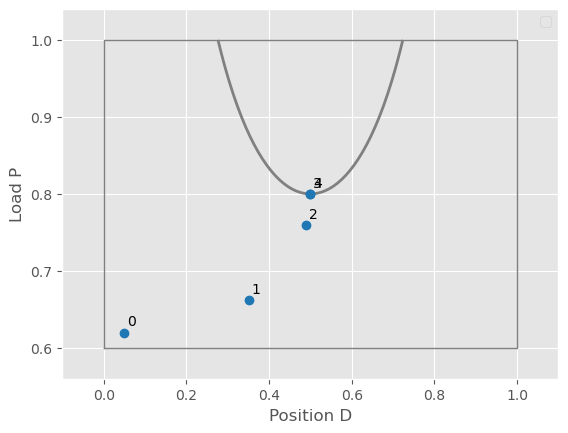

   k               y_k      B   g(x)         grad_g(x)  ||grad_g(x)||   g(y)  \
0  0  [-2.496, -1.407]  2.866  0.171   [-0.058, 0.033]          0.066  0.171   
1  1  [-0.906, -0.871]  1.257  0.049   [-0.073, 0.019]          0.075  0.049   
2  2  [-0.162, -0.224]  0.276  0.010  [-0.006, -0.041]          0.042  0.010   
3  3  [-0.003, -0.001]  0.003  0.000    [-0.0, -0.046]          0.046  0.000   
4  4      [-0.0, -0.0]  0.000  0.000     [0.0, -0.047]          0.047  0.000   

              x_k  
0    [0.05, 0.62]  
1  [0.352, 0.662]  
2   [0.49, 0.759]  
3    [0.499, 0.8]  
4      [0.5, 0.8]  


In [25]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

# Equação do estado limite g(X)
X1,e,P,L = sp.symbols('X1 e P L')
vetor_simbolico_x = [X1, P]
e = 0.05
L = 1
g_sym_function = (L / 4) - e - (P * (X1 - ((X1**2) / L)))

def g_fun_numerica(x: np.ndarray) -> float:
    e = 0.05
    L = 1
    return (L / 4) - e - (x[1] * (x[0] - ((x[0]**2) / L)))

# Transformação X -> Y da equação de estado-limite g(X)
Y1,e,p,L = sp.symbols('Y1 e p L')
vetor_simbolico_y = [Y1, p]
def g_y_simbolico_fun (vetor_x_simbolico):
    e = 0.05
    L = 1
    return (L / 4) - e - (vetor_x_simbolico[1] * (vetor_x_simbolico[0] - ((vetor_x_simbolico[0]**2) / L)))

# Descrição das variáveis aleatórias 
X1 = variavel_aleatoria(distribuicao='uniforme', nome='Posicao', simbolo='X1')
a_x_1 = 0
b_x_1 = 1
amplitude_x_1 = b_x_1 - a_x_1
X1.conjunto_parametros(a_x_1, amplitude_x_1) 

X2 = variavel_aleatoria(distribuicao='uniforme', nome='Carga', simbolo='X2')
a_x_2 = 0.6
b_x_2 = 1
amplitude_x_2 = b_x_2 - a_x_2
X2.conjunto_parametros(a_x_2, amplitude_x_2) 

vetor_va = [X1, X2]

# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((2, 2)) # Matriz das observações para iniciar o algoritmo

Rx_entrada = np.array([
    [1.0, 0.5],
    [0.5, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va)
vx_obj.matriz_correlacao_x = Rx_entrada
Rz = vx_obj.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start = np.array([0.05, 0.62])
ponto_projeto_obj = Ponto_projeto_iHRLF_mod(vx_obj, g_fun_numerica, vetor_simbolico_y, g_y_simbolico_fun, g_sym_function, vetor_simbolico_x, x_start, max_iter=500)

# Resultado da iteração
resultado_iteração = ponto_projeto_obj.execution()
dados_arredondados = [[np.round(x, 3) for x in linha] for linha in resultado_iteração]

# Montagem da tabela
tabela = pd.DataFrame(dados_arredondados, columns=['k', 'y_k', 'B', 'g(x)', 'grad_g(x)', '||grad_g(x)||', 'g(y)', 'x_k' ])

#Plot
# Vetor com os valores de das variáveis
coluna_vetor_x = tabela['x_k'] 

# Separação de X1 e X2
X1_coords = coluna_vetor_x.apply(lambda vec: vec[0]) # Pega a 1ª componente (Posição)
X2_coords = coluna_vetor_x.apply(lambda vec: vec[1]) # Pega a 2ª componente (Carga P)

# Dominio a ser aplicado à g(X)
X1_min, X1_max = a_x_1, b_x_1 # Limites da Uniforme X1
X2_min, X2_max = a_x_2, b_x_2 # Limites da Uniforme X2 (corrigido!)

# Cria uma grade (mesh) de 100x100 pontos para X1 e X2
num_points = 100
X1_grid = np.linspace(X1_min, X1_max, num_points)
X2_grid = np.linspace(X2_min, X2_max, num_points)
X_mesh_1, X_mesh_2 = np.meshgrid(X1_grid, X2_grid)

# Calculo de g(X)
G_values = np.zeros(X_mesh_1.shape)
for i in range(num_points):
    for j in range(num_points):
        x_point = np.array([X_mesh_1[i, j], X_mesh_2[i, j]])
        G_values[i, j] = g_fun_numerica(x_point)

# Contorno dos valores possíveis
plt.plot([X1_min, X1_max, X1_max, X1_min, X1_min], 
         [X2_min, X2_min, X2_max, X2_max, X2_min], 
         color='gray', linestyle='-', linewidth=1)

# Plot de g(X)
plt.contour(X_mesh_1, X_mesh_2, G_values, levels=[0], colors='gray', linestyles='-', linewidths=2, label='g(X)=0')

# Trajetória de convergência
plt.plot(X1_coords, X2_coords, marker='o',linestyle='', color='tab:blue')
plt.scatter(X1_coords.iloc[-1], X2_coords.iloc[-1], color='red', marker='o')

# Anotações dos pontos
for k, (x1, x2) in enumerate(zip(X1_coords, X2_coords)):
    plt.annotate(str(k), (x1, x2), textcoords="offset points", xytext=(5,5), ha='center')

# Ajusta os limites do eixo para cobrir o domínio e um pouco mais
plt.xlim(X1_min - 0.1*(X1_max-X1_min), X1_max + 0.1*(X1_max-X1_min))
plt.ylim(X2_min - 0.1*(X2_max-X2_min), X2_max + 0.1*(X2_max-X2_min))

plt.xlabel('Position D')
plt.ylabel('Load P')
plt.legend()
plt.show()
print(tabela)

# Tarefa T9
Para a resolução da tarefa 9, vamos utilizar o algoritmo HLRF abaixo:

In [3]:

import numpy as np
import scipy as sc
import sympy as sp
from sympy.utilities.lambdify import lambdify
from typing import Callable, List, Tuple

class Ponto_projeto_HRLF:
    def __init__(self, vx_obj, g_fun_numerica_x, vetor_simbolico_y, g_y_simbolico, g_sym_fun, vetor_simbolico, x_inicial, max_iter=100):

        # Inicialização das variáveis
        self.vx_obj = vx_obj 
        self.g_fun_x_num = g_fun_numerica_x
        self.vetor_simbolico_y = vetor_simbolico_y
        self.g_y_simbolico = g_y_simbolico
        self.grad_g_x_fun = self.calcular_gradiente_simbolico_x(g_sym_fun, vetor_simbolico)
        self.x_estrela_atual = x_inicial
        self.max_iter = max_iter
        self.historico = []

    # Atualização das matrizes de média e desvio padrão equivalente
    def normal_equivalente_no_ponto (self, vetor_x: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:

        mu_neq_lista = []
        sigma_neq_lista = []

        for i, va in enumerate(self.vx_obj.vetor_va_cust):
            x_i = vetor_x[i]

            cdf_xi = va.CDF(x_i)
            pdf_xi = va.PDF(x_i)

            z_i = sc.stats.norm.ppf(cdf_xi)
            phi_zi = sc.stats.norm.pdf(z_i)

            sigma_neq_i = phi_zi / pdf_xi
            mu_neq_i = x_i - (z_i * sigma_neq_i)

            mu_neq_lista.append(mu_neq_i)
            sigma_neq_lista.append(sigma_neq_i)

        return np.array(mu_neq_lista), np.diag(sigma_neq_lista)
    
    # Calculo do gradiente numérico da função g(x) a partir da função simbólica fornecida paara g(x)
    def calcular_gradiente_simbolico_x(self, g_sym:sp.Expr, vetor_simbolico: List[sp.Symbol]) -> Callable:
        
        grad_g_sym = [sp.diff(g_sym, x_i) for x_i in vetor_simbolico]

        grad_g_numeric = lambdify(vetor_simbolico, grad_g_sym, 'numpy')
        
        def grad_g_x_numerico(x_vals: np.ndarray) -> np.ndarray:
            return np.array(grad_g_numeric(*x_vals))
        
        return grad_g_x_numerico
     
    # Estrutura principal de calculo e iteração em busca do ponto de projeto
    def execution (self,):

        historico = [] # Vetor que armazena o histórico de iterações

        for k in range(self.max_iter):
            
            # Ponto de projeto x* para a iteração k
            x_k = self.x_estrela_atual 

            # Atualização das matrizes de média e desvio padrão equivalentes para o ponto x_k
            # Calculo dos Jacobianos da transformação X -> Z
            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)
            
            # Trandformação do ponto xk -> yk
            y_k = J_yx @ (x_k - mu_neq)

            # Calculo do índice de confiabilidade para o ponto yk
            beta_k = np.linalg.norm(y_k)
            
            # Avaliação das funções g(x) em x_k e g(y) em y_k
            g_x = self.g_fun_x_num(x_k)
            g_y = calculo_g_y(y_k)

            if k == 0:
                g_y_zero = g_y

            # Calculo do gradiente de g(x) no espaço de projeto X em x_k
            grad_g_x = self.grad_g_x_fun(x_k)

            # Calculo do gradiente de g(y) em y_k a partir da transformação X -> Y
            grad_g_y = (J_xy.T) @ grad_g_x

            # Calculo dos coeficientes de sensibilidade
            alpha = grad_g_y / np.linalg.norm(grad_g_y)

            historico.append([
                k, 
                y_k, 
                beta_k, 
                g_x, 
                grad_g_y, 
                np.linalg.norm(grad_g_y),
                g_y,
                x_k
            ])  

            # Calculo do ponto de projeto y_k+1
            y_k_mais_1 = (((1 / np.linalg.norm(grad_g_y)) ** 2) * (((grad_g_y.T) @ y_k) - g_y)) * grad_g_y # Algoritmo HLRF
            #y_k_mais_1 = - alpha * (beta_k + ((g_y) / np.linalg.norm(grad_g_y)))
            
            # Calculo do ponto x_k+1 a partir da tranformação Y -> X
            x_k_mais_1 = (J_xy @ y_k_mais_1) + mu_neq

            mu_neq, D_neq = self.normal_equivalente_no_ponto(x_k_mais_1)
            D_neq_inv = np.linalg.inv(D_neq)
            J_yz = self.vx_obj.decomposicao_cholesky()[0]
            J_zy = self.vx_obj.decomposicao_cholesky()[1]

            # Atualização dos Jacobianos da transformação X -> Y
            J_xy = D_neq @ J_zy
            J_yx = J_yz @ D_neq_inv

            vetor_simbolico_y = self.vetor_simbolico_y
            vetor_simbolico_x_calc = (J_xy @ vetor_simbolico_y) + mu_neq
            g_y_simbolico = self.g_y_simbolico(vetor_simbolico_x_calc)
            g_y_numerico = lambdify(vetor_simbolico_y, g_y_simbolico, 'numpy')
            def calculo_g_y(vetor_y):
                return g_y_numerico(*vetor_y)

            # Verificação da convergência do ponto y_k+1
            ep = 1e-3    
            g_x_mais_1 = self.g_fun_x_num(x_k_mais_1)
            grad_x_mais_1 = self.grad_g_x_fun(x_k_mais_1)

            g_y_mais_1 = calculo_g_y(y_k_mais_1)
            grad_y_mais_1 = (J_xy.T) @ grad_x_mais_1

            alpha_mais_1 = grad_y_mais_1 / np.linalg.norm(grad_y_mais_1)

            verificador = 1 - (abs((grad_y_mais_1.T @ y_k_mais_1) / ((np.linalg.norm(grad_y_mais_1)) * (np.linalg.norm(y_k_mais_1)))))
            
            if verificador < ep:
                if abs(g_y_mais_1) < abs (ep * g_y_zero):

                    historico.append([
                        k+1, 
                        y_k_mais_1, 
                        np.linalg.norm(y_k_mais_1), 
                        g_x_mais_1, 
                        grad_y_mais_1, 
                        np.linalg.norm(grad_y_mais_1),
                        g_y_mais_1,
                        x_k_mais_1
                    ])  

                    break
                else:
                    self.x_estrela_atual = x_k_mais_1 
            else:
                self.x_estrela_atual = x_k_mais_1

                if k == self.max_iter - 1:
                    print(f"Não convergiu em {self.max_iter} iterações")
    
        return historico


Com o objetivo de validar o algoritmo de busca, vamos resolver inicialmente o exemplo 8 do livro, considerando a distribuição normal das variáveis.

In [4]:
import numpy as np
import sympy as sp
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

# Parâmetros gerais
r_1 = 4.0 #Raio da barra em metros
r_2 = 5.2 #Raio da barra em metros
A_1 = np.pi * (r_1 ** 2)
A_2 = np.pi * (r_2 ** 2)
I_1 = (np.pi * (r_1**4)) / 4
I_2 = (np.pi * (r_2**4)) / 4
v = 0.3 # Vão da treliça em metros
k = 0.5 # Fator correspondente a altura
h = k * v
L = np.sqrt((v**2) + (h**2))

# Equação do estado limite gR1(X)
S,H,V = sp.symbols('S H V')
vetor_simbolico_gR1 = [S, H, V]
g_sym_function_gR1 = ((A_1 * S) / 1000) - ((L / (2 * v)) * (H - (V / k)))

def g_fun_numerica_gR1(x: np.ndarray) -> float:
    return ((A_1 * x[0]) / 1000) - ((L / (2 * v)) * (x[1] - (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gR1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gR1 (vetor_x_simbolico):
    return  ((A_1 * vetor_x_simbolico[0]) / 1000) - ((L / (2 * v)) * (vetor_x_simbolico[1] - (vetor_x_simbolico[2] / k))) 

# Equação do estado limite gE1(X)
E,H,V = sp.symbols('E H V')
vetor_simbolico_gE1 = [E, H, V]
g_sym_function_gE1 = (((np.pi**2) * E * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-H + (V / k)))

def g_fun_numerica_gE1(x: np.ndarray) -> float:
    return (((np.pi**2) * x[0] * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-x[1] + (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gE1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gE1 (vetor_x_simbolico):
    return  (((np.pi**2) * vetor_x_simbolico[0] * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-vetor_x_simbolico[1] + (vetor_x_simbolico[2] / k)))

# Equação do estado limite gE2(X)
E,H,V = sp.symbols('E H V')
vetor_simbolico_gE2 = [E, H, V]
g_sym_function_gE2 = (((np.pi**2) * E * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (H + (V / k)))

def g_fun_numerica_gE2(x: np.ndarray) -> float:
    return (((np.pi**2) * x[0] * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (x[1] + (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gE1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gE2 (vetor_x_simbolico):
    return  (((np.pi**2) * vetor_x_simbolico[0] * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (vetor_x_simbolico[1] + (vetor_x_simbolico[2] / k)))

# Descrição das variáveis aleatórias 

# Tensão de ruptura à tração (MPa)
media_S = 24.5643
desvio_S = media_S * 0.1
S = variavel_aleatoria(distribuicao='normal', nome='Tensao_ruptura', simbolo='S')
S.conjunto_parametros(media_S, desvio_S) 

# Modulo de elasticidade (GPa)
media_E = 70.0 
desvio_E = media_E * 0.03
E = variavel_aleatoria(distribuicao='normal', nome='Modulo_elasticidade', simbolo='E')
E.conjunto_parametros(media_E, desvio_E) 

# Força horizontal (kN)
media_H = 2.0 
desvio_H = media_H * 0.2
H = variavel_aleatoria(distribuicao='normal', nome='Forca_horizontal', simbolo='H')
H.conjunto_parametros(media_H, desvio_H) 

# Força vertical (kN)
media_V = 1.0 
desvio_V = media_V * 0.2
V = variavel_aleatoria(distribuicao='normal', nome='Forca_vertical', simbolo='V')
V.conjunto_parametros(media_V, desvio_V) 

vetor_va_gR1 = [S, H, V]
vetor_va_gE1_gE2 = [E, H, V]


# Considerando apenas a função gR1
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada_gR1 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gR1 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gR1)
vx_obj_gR1.matriz_correlacao_x = Rx_entrada_gR1
Rz = vx_obj_gR1.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gR1.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gR1 = np.array([media_S, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gR1, g_fun_numerica_gR1, vetor_simbolico_gR1, g_y_simbolico_fun_gR1, g_sym_function_gR1, vetor_simbolico_gR1, x_start_gR1, max_iter=200)

# Resultado da iteração
resultado_iteração_gR1 = ponto_projeto_obj.execution()
beta_R1 = resultado_iteração_gR1[1][2]
grad_y_R1 = resultado_iteração_gR1[0][4]

# Considerando apenas a função gE1
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo


Rx_entrada_gE1 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gE1 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gE1_gE2)
vx_obj_gE1.matriz_correlacao_x = Rx_entrada_gE1
Rz = vx_obj_gE1.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gE1.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gE1 = np.array([media_E, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gE1, g_fun_numerica_gE1, vetor_simbolico_gE1, g_y_simbolico_fun_gE1, g_sym_function_gE1, vetor_simbolico_gE1, x_start_gE1, max_iter=200)

# Resultado da iteração
resultado_iteração_gE1 = ponto_projeto_obj.execution()
beta_E1 = resultado_iteração_gE1[1][2]
grad_y_E1 = resultado_iteração_gE1[0][4]

# Considerando apenas a função gE2
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada_gE2 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gE2 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gE1_gE2)
vx_obj_gE2.matriz_correlacao_x = Rx_entrada_gE2
Rz = vx_obj_gE2.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gE2.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gE2 = np.array([media_E, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gE2, g_fun_numerica_gE2, vetor_simbolico_gE2, g_y_simbolico_fun_gE2, g_sym_function_gE2, vetor_simbolico_gE2, x_start_gE2, max_iter=200)

# Resultado da iteração
resultado_iteração_gE2 = ponto_projeto_obj.execution()
beta_E2 = resultado_iteração_gE2[1][2]
grad_y_E2 = resultado_iteração_gE2[0][4]

corr_R1_E1 = (grad_y_R1.T / np.linalg.norm(grad_y_R1)) @ (grad_y_E1 / np.linalg.norm(grad_y_E1))
corr_R1_E2 = (grad_y_R1.T / np.linalg.norm(grad_y_R1)) @ (grad_y_E2 / np.linalg.norm(grad_y_E2))
corr_E1_E2 = (grad_y_E1.T / np.linalg.norm(grad_y_E1)) @ (grad_y_E2 / np.linalg.norm(grad_y_E2))

# Interseção entre E2 e R1
# Probabilidade do evento Aij
CDF_beta_E2 = st.norm.cdf(-beta_E2)
Y_A_ij = (beta_R1 - (corr_R1_E2 * beta_E2)) / (np.sqrt(1 - (corr_R1_E2**2)))
P_A_ij = CDF_beta_E2 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_R1 = st.norm.cdf(-beta_R1)
Y_B_ij = (beta_E2 - (corr_R1_E2 * beta_R1)) / (np.sqrt(1 - (corr_R1_E2**2)))
P_B_ij = CDF_beta_R1 * st.norm.cdf(-Y_B_ij)

if corr_R1_E2 >= 0:
    P_E2_inter_R1_inf = P_A_ij + P_B_ij
    P_E2_inter_R1_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E2_inter_R1_inf = np.minimum(P_A_ij, P_B_ij)
    P_E2_inter_R1_sup = 0

# Interseção entre E1 e R1
# Probabilidade do evento Aij
CDF_beta_E1 = st.norm.cdf(-beta_E1)
Y_A_ij = (beta_R1 - (corr_R1_E1 * beta_E1)) / (np.sqrt(1 - (corr_R1_E1**2)))
P_A_ij = CDF_beta_E1 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_R1 = st.norm.cdf(-beta_R1)
Y_B_ij = (beta_E1 - (corr_R1_E1 * beta_R1)) / (np.sqrt(1 - (corr_R1_E1**2)))
P_B_ij = CDF_beta_R1 * st.norm.cdf(-Y_B_ij)

if corr_R1_E1 >= 0:
    P_E1_inter_R1_inf = P_A_ij + P_B_ij
    P_E1_inter_R1_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E1_inter_R1_inf = np.minimum(P_A_ij, P_B_ij)
    P_E1_inter_R1_sup = 0

# Interseção entre E1 e E2
# Probabilidade do evento Aij
CDF_beta_E1 = st.norm.cdf(-beta_E1)
Y_A_ij = (beta_E2 - (corr_E1_E2 * beta_E1)) / (np.sqrt(1 - (corr_E1_E2**2)))
P_A_ij = CDF_beta_E1 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_E2 = st.norm.cdf(-beta_E2)
Y_B_ij = (beta_E1 - (corr_E1_E2 * beta_R1)) / (np.sqrt(1 - (corr_E1_E2**2)))
P_B_ij = CDF_beta_E2 * st.norm.cdf(-Y_B_ij)

if corr_E1_E2 >= 0:
    P_E1_inter_E2_inf = P_A_ij + P_B_ij
    P_E1_inter_E2_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E1_inter_E2_inf = np.minimum(P_A_ij, P_B_ij)
    P_E1_inter_E2_sup = 0

# Limite inferior da probbilidade de falha do sistema
CDF_beta_R1 = st.norm.cdf(-beta_R1)
CDF_beta_E2 = st.norm.cdf(-beta_E2)
CDF_beta_E1 = st.norm.cdf(-beta_E1)

pf_sis_inf = CDF_beta_R1 + CDF_beta_E2 + CDF_beta_E1 - P_E2_inter_R1_inf - P_E1_inter_R1_inf - P_E1_inter_E2_inf

# Limite superior da probbilidade de falha do sistema
pf_sis_sup = CDF_beta_R1 + CDF_beta_E2 + CDF_beta_E1 - P_E2_inter_R1_sup - (np.maximum(P_E1_inter_R1_sup, P_E1_inter_E2_sup))

print("Utilizando os limites bi-modais:")
print(f"Temos que o limite inferiror é {pf_sis_inf}")
print(f"Temos que o limite superior é {pf_sis_sup}")

Utilizando os limites bi-modais:
Temos que o limite inferiror é 0.00024481642446670286
Temos que o limite superior é 0.0002448567132134047


Uma vez que o o algoritmo conseguiu reproduzir os resultados do exemplo 8, agora vamos resolve-lo considerando distirbuições log-normais.

In [6]:
import numpy as np
import sympy as sp
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

# Parâmetros gerais
r_1 = 4.0 #Raio da barra em metros
r_2 = 5.2 #Raio da barra em metros
A_1 = np.pi * (r_1 ** 2)
A_2 = np.pi * (r_2 ** 2)
I_1 = (np.pi * (r_1**4)) / 4
I_2 = (np.pi * (r_2**4)) / 4
v = 0.3 # Vão da treliça em metros
k = 0.5 # Fator correspondente a altura
h = k * v
L = np.sqrt((v**2) + (h**2))

# Equação do estado limite gR1(X)
S,H,V = sp.symbols('S H V')
vetor_simbolico_gR1 = [S, H, V]
g_sym_function_gR1 = ((A_1 * S) / 1000) - ((L / (2 * v)) * (H - (V / k)))

def g_fun_numerica_gR1(x: np.ndarray) -> float:
    return ((A_1 * x[0]) / 1000) - ((L / (2 * v)) * (x[1] - (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gR1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gR1 (vetor_x_simbolico):
    return  ((A_1 * vetor_x_simbolico[0]) / 1000) - ((L / (2 * v)) * (vetor_x_simbolico[1] - (vetor_x_simbolico[2] / k))) 

# Equação do estado limite gE1(X)
E,H,V = sp.symbols('E H V')
vetor_simbolico_gE1 = [E, H, V]
g_sym_function_gE1 = (((np.pi**2) * E * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-H + (V / k)))

def g_fun_numerica_gE1(x: np.ndarray) -> float:
    return (((np.pi**2) * x[0] * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-x[1] + (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gE1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gE1 (vetor_x_simbolico):
    return  (((np.pi**2) * vetor_x_simbolico[0] * I_1) / ((L**2) * 1e6)) - ((L / (2 * v)) * (-vetor_x_simbolico[1] + (vetor_x_simbolico[2] / k)))

# Equação do estado limite gE2(X)
E,H,V = sp.symbols('E H V')
vetor_simbolico_gE2 = [E, H, V]
g_sym_function_gE2 = (((np.pi**2) * E * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (H + (V / k)))

def g_fun_numerica_gE2(x: np.ndarray) -> float:
    return (((np.pi**2) * x[0] * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (x[1] + (x[2] / k)))

# Transformação X -> Y da equação de estado-limite gE1(X)
Y1,Y2,Y3 = sp.symbols('Y1 Y2 Y3')
vetor_simbolico_y = [Y1, Y2, Y3]
def g_y_simbolico_fun_gE2 (vetor_x_simbolico):
    return  (((np.pi**2) * vetor_x_simbolico[0] * I_2) / ((L**2) * 1e6)) - ((L / (2 * v)) * (vetor_x_simbolico[1] + (vetor_x_simbolico[2] / k)))

# Descrição das variáveis aleatórias 

# Tensão de ruptura à tração (MPa)
media_S = 24.5643
desvio_S = media_S * 0.1
S = variavel_aleatoria(distribuicao='lognormal', nome='Tensao_ruptura', simbolo='S')
S.calculo_parametros(media_S, desvio_S) 

# Modulo de elasticidade (GPa)
media_E = 70.0 
desvio_E = media_E * 0.03
E = variavel_aleatoria(distribuicao='lognormal', nome='Modulo_elasticidade', simbolo='E')
E.calculo_parametros(media_E, desvio_E) 

# Força horizontal (kN)
media_H = 2.0 
desvio_H = media_H * 0.2
H = variavel_aleatoria(distribuicao='lognormal', nome='Forca_horizontal', simbolo='H')
H.calculo_parametros(media_H, desvio_H) 

# Força vertical (kN)
media_V = 1.0 
desvio_V = media_V * 0.2
V = variavel_aleatoria(distribuicao='lognormal', nome='Forca_vertical', simbolo='V')
V.calculo_parametros(media_V, desvio_V) 

vetor_va_gR1 = [S, H, V]
vetor_va_gE1_gE2 = [E, H, V]


# Considerando apenas a função gR1
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada_gR1 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gR1 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gR1)
vx_obj_gR1.matriz_correlacao_x = Rx_entrada_gR1
Rz = vx_obj_gR1.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gR1.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gR1 = np.array([media_S, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gR1, g_fun_numerica_gR1, vetor_simbolico_gR1, g_y_simbolico_fun_gR1, g_sym_function_gR1, vetor_simbolico_gR1, x_start_gR1, max_iter=200)

# Resultado da iteração
resultado_iteração_gR1 = ponto_projeto_obj.execution()
beta_R1 = resultado_iteração_gR1[1][2]
grad_y_R1 = resultado_iteração_gR1[0][4]

# Considerando apenas a função gE1
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo


Rx_entrada_gE1 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gE1 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gE1_gE2)
vx_obj_gE1.matriz_correlacao_x = Rx_entrada_gE1
Rz = vx_obj_gE1.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gE1.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gE1 = np.array([media_E, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gE1, g_fun_numerica_gE1, vetor_simbolico_gE1, g_y_simbolico_fun_gE1, g_sym_function_gE1, vetor_simbolico_gE1, x_start_gE1, max_iter=200)

# Resultado da iteração
resultado_iteração_gE1 = ponto_projeto_obj.execution()
beta_E1 = resultado_iteração_gE1[1][2]
grad_y_E1 = resultado_iteração_gE1[0][4]

# Considerando apenas a função gE2
# Montagem das matrizes de observações e correlações
matriz_dummy_obs = np.zeros((3, 3)) # Matriz das observações para iniciar o algoritmo

Rx_entrada_gE2 = np.array([
    [1.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.0],
])

# 4. Inicializar VX (T3)
vx_obj_gE2 = vetores_variavel_aleatoria(matriz_dummy_obs, vetor_va_gE1_gE2)
vx_obj_gE2.matriz_correlacao_x = Rx_entrada_gE2
Rz = vx_obj_gE2.matriz_correlacao_nataf() # Garante que Cz é calculado (Cz = Rx = I)
J_yz, J_zy = vx_obj_gE2.decomposicao_cholesky()

# Ponto inicial (ponto médio)
x_start_gE2 = np.array([media_E, media_H, media_V])
ponto_projeto_obj = Ponto_projeto_HRLF(vx_obj_gE2, g_fun_numerica_gE2, vetor_simbolico_gE2, g_y_simbolico_fun_gE2, g_sym_function_gE2, vetor_simbolico_gE2, x_start_gE2, max_iter=200)

# Resultado da iteração
resultado_iteração_gE2 = ponto_projeto_obj.execution()
beta_E2 = resultado_iteração_gE2[1][2]
grad_y_E2 = resultado_iteração_gE2[0][4]

corr_R1_E1 = (grad_y_R1.T / np.linalg.norm(grad_y_R1)) @ (grad_y_E1 / np.linalg.norm(grad_y_E1))
corr_R1_E2 = (grad_y_R1.T / np.linalg.norm(grad_y_R1)) @ (grad_y_E2 / np.linalg.norm(grad_y_E2))
corr_E1_E2 = (grad_y_E1.T / np.linalg.norm(grad_y_E1)) @ (grad_y_E2 / np.linalg.norm(grad_y_E2))

# Interseção entre E2 e R1
# Probabilidade do evento Aij
CDF_beta_E2 = st.norm.cdf(-beta_E2)
Y_A_ij = (beta_R1 - (corr_R1_E2 * beta_E2)) / (np.sqrt(1 - (corr_R1_E2**2)))
P_A_ij = CDF_beta_E2 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_R1 = st.norm.cdf(-beta_R1)
Y_B_ij = (beta_E2 - (corr_R1_E2 * beta_R1)) / (np.sqrt(1 - (corr_R1_E2**2)))
P_B_ij = CDF_beta_R1 * st.norm.cdf(-Y_B_ij)

if corr_R1_E2 >= 0:
    P_E2_inter_R1_inf = P_A_ij + P_B_ij
    P_E2_inter_R1_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E2_inter_R1_inf = np.minimum(P_A_ij, P_B_ij)
    P_E2_inter_R1_sup = 0

# Interseção entre E1 e R1
# Probabilidade do evento Aij
CDF_beta_E1 = st.norm.cdf(-beta_E1)
Y_A_ij = (beta_R1 - (corr_R1_E1 * beta_E1)) / (np.sqrt(1 - (corr_R1_E1**2)))
P_A_ij = CDF_beta_E1 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_R1 = st.norm.cdf(-beta_R1)
Y_B_ij = (beta_E1 - (corr_R1_E1 * beta_R1)) / (np.sqrt(1 - (corr_R1_E1**2)))
P_B_ij = CDF_beta_R1 * st.norm.cdf(-Y_B_ij)

if corr_R1_E1 >= 0:
    P_E1_inter_R1_inf = P_A_ij + P_B_ij
    P_E1_inter_R1_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E1_inter_R1_inf = np.minimum(P_A_ij, P_B_ij)
    P_E1_inter_R1_sup = 0

# Interseção entre E1 e E2
# Probabilidade do evento Aij
CDF_beta_E1 = st.norm.cdf(-beta_E1)
Y_A_ij = (beta_E2 - (corr_E1_E2 * beta_E1)) / (np.sqrt(1 - (corr_E1_E2**2)))
P_A_ij = CDF_beta_E1 * st.norm.cdf(-Y_A_ij)

# Probabilidade do evento Bij
CDF_beta_E2 = st.norm.cdf(-beta_E2)
Y_B_ij = (beta_E1 - (corr_E1_E2 * beta_R1)) / (np.sqrt(1 - (corr_E1_E2**2)))
P_B_ij = CDF_beta_E2 * st.norm.cdf(-Y_B_ij)

if corr_E1_E2 >= 0:
    P_E1_inter_E2_inf = P_A_ij + P_B_ij
    P_E1_inter_E2_sup = np.maximum(P_A_ij, P_B_ij)
else:
    P_E1_inter_E2_inf = np.minimum(P_A_ij, P_B_ij)
    P_E1_inter_E2_sup = 0

# Limite inferior da probbilidade de falha do sistema
CDF_beta_R1 = st.norm.cdf(-beta_R1)
CDF_beta_E2 = st.norm.cdf(-beta_E2)
CDF_beta_E1 = st.norm.cdf(-beta_E1)

pf_sis_inf = CDF_beta_R1 + CDF_beta_E2 + CDF_beta_E1 - P_E2_inter_R1_inf - P_E1_inter_R1_inf - P_E1_inter_E2_inf

# Limite superior da probbilidade de falha do sistema
pf_sis_sup = CDF_beta_R1 + CDF_beta_E2 + CDF_beta_E1 - P_E2_inter_R1_sup - (np.maximum(P_E1_inter_R1_sup, P_E1_inter_E2_sup))

print("Utilizando os limites bi-modais e distribuições log-normal:")
print(f"Temos que o limite inferiror é {pf_sis_inf}")
print(f"Temos que o limite superior é {pf_sis_sup}")

Utilizando os limites bi-modais e distribuições log-normal:
Temos que o limite inferiror é 0.00038538496030342
Temos que o limite superior é 0.00038541334453312044


# Tarefa 10